# 🌍 Impact Visualization Challenge: 地震の「衝撃」を見える化する

## 概要
USGS のライブ地震データを取得し、世界で発生した地震の位置・規模・深さを
可視化した。特に「マグニチュードの大きさ」と「深さ」に注目し、
地図上に円の大きさと色で表現することで、地震のインパクトを視覚的に表現した。

In [1]:

import pandas as pd
import requests
import folium

# USGSの最新1日の地震データ（GeoJSON形式）
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
data = requests.get(url).json()

# JSONをDataFrame化
features = data["features"]
df = pd.DataFrame([{
    "place": f["properties"]["place"],
    "mag": f["properties"]["mag"],
    "time": pd.to_datetime(f["properties"]["time"], unit="ms"),
    "lon": f["geometry"]["coordinates"][0],
    "lat": f["geometry"]["coordinates"][1],
    "depth": f["geometry"]["coordinates"][2]
} for f in features])

df.head()


,place,mag,time,lon,lat,depth
0,"57 km ESE of Whittier, Alaska",1.90,2025-11-11 03:15:44.139,-147.661400,60.646800,17.90
1,"24 km S of Twentynine Palms, CA",0.92,2025-11-11 02:49:40.730,-116.060167,33.924167,2.67
2,"63 km W of Kíssamos, Greece",4.90,2025-11-11 01:58:19.072,22.957500,35.476900,35.00
3,"12 km SE of Middletown, CA",1.44,2025-11-11 01:55:41.690,-122.500168,38.687668,6.56
4,"13 km ENE of Ocotillo, CA",0.84,2025-11-11 01:49:19.260,-115.867333,32.785833,7.05


In [2]:
# 中心を日本付近に設定
m = folium.Map(location=[35, 140], zoom_start=2, tiles="CartoDB positron")

# 地震のマーカーを追加
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=max(row["mag"] or 0, 0.1) * 2,
        color="red" if row["mag"] >= 5 else "orange",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['place']} (M{row['mag']}, 深さ{row['depth']}km)"
    ).add_to(m)

m

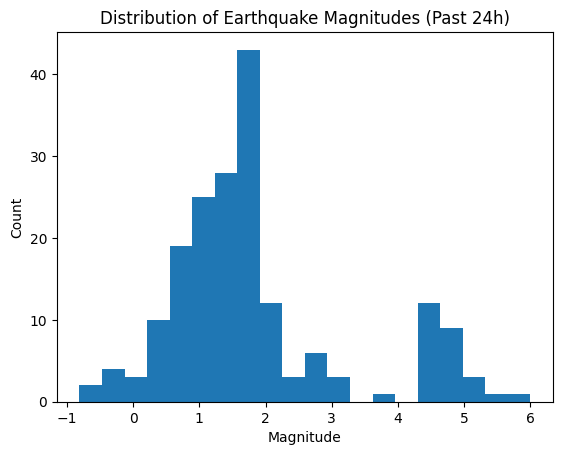

In [3]:
import matplotlib.pyplot as plt

plt.hist(df["mag"].dropna(), bins=20)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Distribution of Earthquake Magnitudes (Past 24h)")
plt.show()

## やったこと、わかったこと、感じたこと
USGS のライブ地震データを取得し、世界で過去24時間に発生した地震を地図上に可視化した。
マグニチュードが大きい地震ほど円を大きく、色を赤くして「衝撃度」を直感的に表現した。
分析では、マグニチュード4〜5程度の中規模地震が多く発生しており、
深さが浅い地震は陸地付近に多い傾向が見られた。
地震データを地図で表すことで、ニュースでは見えない「地球全体の揺れの現実」を感じ取ることができた。
特に視覚的な表現を通して、自然現象のスケールの大きさを実感した。

In [4]:
m.save("earthquake_map.html")